In [75]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
from os import listdir
from os.path import isfile

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [78]:
dir = "../Resources/"

In [79]:
all_files = [x for x in listdir(dir) if (".xlsx" in x or ".csv" in x)]
all_files

['corn.xlsx',
 'live cattle.xlsx',
 'feeder cattle.xlsx',
 'soybean meal.xlsx',
 'lean hogs.xlsx']

In [80]:
all_df = pd.DataFrame()
for x in all_files:
    a = x.replace(".xlsx", "")
    df = pd.read_excel(dir+x)
    df["name"] = a
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date")
    df = df.sort_index()
    df = df.dropna()
    df = df[df['Volume'] != 0.0]
    df.drop(['Volume'], axis=1, inplace=True)
    if a == "corn":
        corn = df
        all_df["corn"] = corn["Price"]
    elif a == "live cattle":
        live_cattle = df
        all_df["live_cattle"] = live_cattle["Price"]
    elif a == "feeder cattle":
        feeder_cattle = df
        all_df["feeder_cattle"] = feeder_cattle["Price"]
    elif a == "soybean meal":
        soybean = df
        all_df["soybean"] = soybean["Price"]
    elif a == "lean hogs":
        hog = df
        all_df["hog"] = hog["Price"]

In [81]:
all_df.head()

,corn,live_cattle,feeder_cattle,soybean,hog
Date,,,,,
2010-11-08,5.8525,98.40,111.25,344.9,NaN
2010-11-09,5.7625,98.20,111.90,362.3,NaN
2010-11-10,5.6675,99.40,112.80,355.4,NaN
2010-11-11,5.6400,99.05,112.65,358.1,NaN
2010-11-12,5.3400,98.40,112.40,339.7,NaN


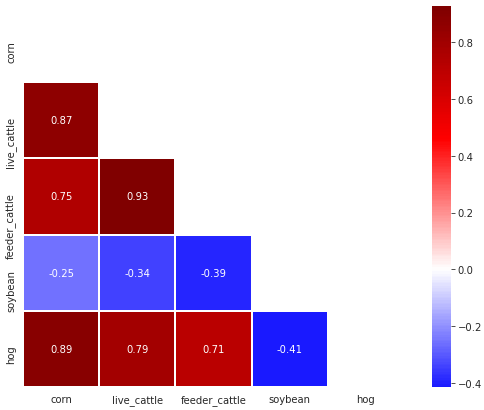

In [82]:
all_df = all_df.dropna()
corrM = all_df.corr()

mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")

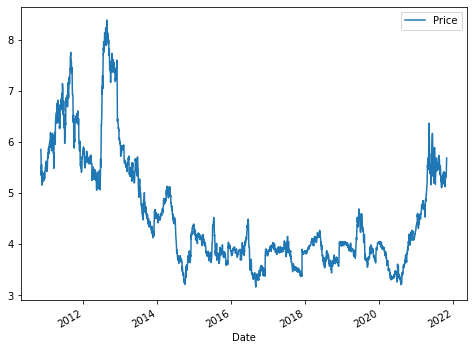

In [83]:
corn.head()
corn.plot(figsize=(8, 6))

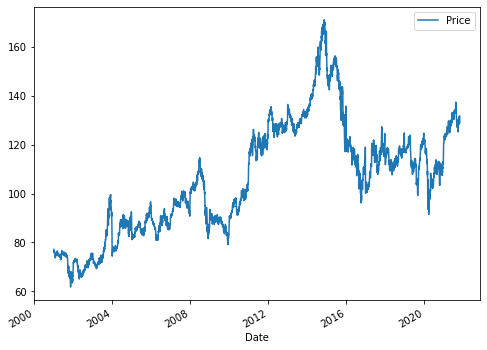

In [84]:
live_cattle.head()
live_cattle.plot(figsize=(8, 6))

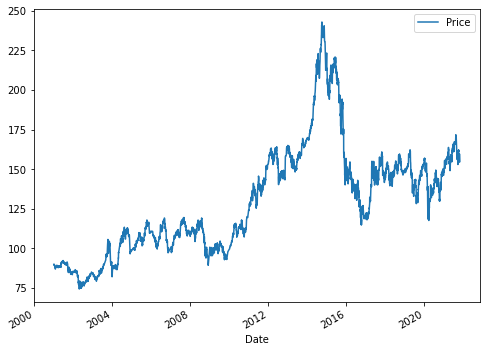

In [85]:
feeder_cattle.head()
feeder_cattle.plot(figsize=(8, 6))

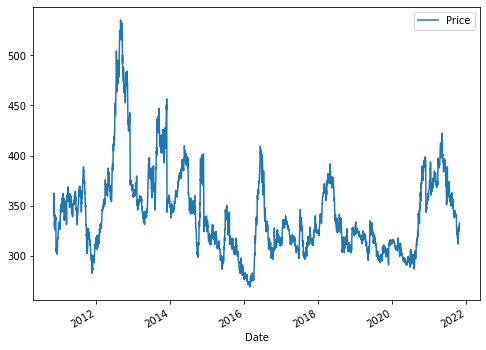

In [86]:
soybean.head()
soybean.plot(figsize=(8, 6))

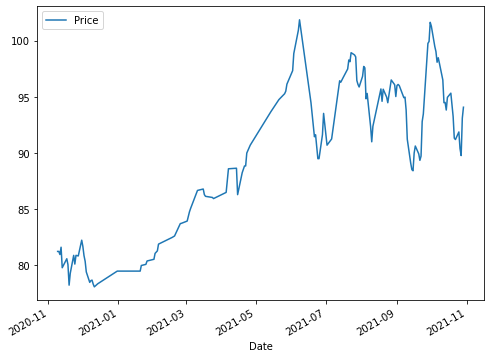

In [87]:
hog.head()
hog.plot(figsize=(8, 6))

In [88]:
# def window_data(df, window, feature_col_number, target_col_number):
#     X = []
#     y = []
#     for i in range(len(df) - window - 1):
#         features = df.iloc[i:(i + window), feature_col_number]
#         target = df.iloc[(i + window), target_col_number]
#         X.append(features)
#         y.append(target)
#     return np.array(X), np.array(y).reshape(-1, 1)

In [89]:
# window_size = 10

# # Column index 0 is the 'fng_value' column
# # Column index 1 is the `Close` column
# feature_column = 1
# target_column = 1
# X, y = window_data(all_df, window_size, feature_column, target_column)
# split = int(0.7 * len(X))
# X_train = X[: split - 1]
# X_test = X[split:]
# y_train = y[: split - 1]
# y_test = y[split:]